In [2]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np

In [4]:
import numpy as np

In [5]:
arr = np.array([1,2,3,4,5,6,7,8,9,10,11,12])
arr 

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [6]:
import pandas as pd

In [7]:
np.random.seed(42)

In [8]:
apartments=[f"Apt_{i}"for i in range(1,21)]

In [9]:
dates =pd.date_range(start="2025-07-01",periods=30,freq="D")

In [10]:
date=pd.DataFrame({
    "Date":np.tile(dates,len(apartments)),
    "Apartment":np.repeat(apartments,len(dates)),
    "Electricity_usage":np.random.normal(loc=20,scale=5,size=len(dates)*len(apartments))
})

In [11]:
df =pd.DataFrame(date)


In [12]:
df

,Date,Apartment,Electricity_usage
0,2025-07-01,Apt_1,22.483571
1,2025-07-02,Apt_1,19.308678
2,2025-07-03,Apt_1,23.238443
3,2025-07-04,Apt_1,27.615149
4,2025-07-05,Apt_1,18.829233
...,...,...,...
595,2025-07-26,Apt_20,17.449918
596,2025-07-27,Apt_20,18.650625
597,2025-07-28,Apt_20,15.106181
598,2025-07-29,Apt_20,17.778534


In [13]:
df["Electricity_usage"]=df["Electricity_usage"].round(2)

In [14]:
df

,Date,Apartment,Electricity_usage
0,2025-07-01,Apt_1,22.48
1,2025-07-02,Apt_1,19.31
2,2025-07-03,Apt_1,23.24
3,2025-07-04,Apt_1,27.62
4,2025-07-05,Apt_1,18.83
...,...,...,...
595,2025-07-26,Apt_20,17.45
596,2025-07-27,Apt_20,18.65
597,2025-07-28,Apt_20,15.11
598,2025-07-29,Apt_20,17.78


In [15]:
print(df.isnull().sum())

Date                 0
Apartment            0
Electricity_usage    0
dtype: int64


In [16]:
print(df.describe())

                      Date  Electricity_usage
count                  600         600.000000
mean   2025-07-15 12:00:00          19.932500
min    2025-07-01 00:00:00           3.790000
25%    2025-07-08 00:00:00          16.530000
50%    2025-07-15 12:00:00          20.040000
75%    2025-07-23 00:00:00          23.112500
max    2025-07-30 00:00:00          39.260000
std                    NaN           4.861071


In [17]:
print(df.dtypes)

Date                 datetime64[ns]
Apartment                    object
Electricity_usage           float64
dtype: object


In [18]:
#Total usage per apartments 
usage_per_apartment=df.groupby("Apartment")["Electricity_usage"].sum().sort_values(ascending=False)
print(usage_per_apartment)

Apartment
Apt_11    642.31
Apt_6     641.82
Apt_13    634.22
Apt_10    616.09
Apt_20    613.14
Apt_7     609.87
Apt_8     607.18
Apt_16    606.97
Apt_14    604.33
Apt_3     601.93
Apt_4     596.99
Apt_15    591.38
Apt_19    586.61
Apt_5     585.76
Apt_2     581.81
Apt_9     578.48
Apt_1     571.80
Apt_17    570.33
Apt_12    568.99
Apt_18    549.49
Name: Electricity_usage, dtype: float64


In [19]:
daily_avg=df.groupby("Date")["Electricity_usage"].mean()
print(daily_avg)

Date
2025-07-01    21.0440
2025-07-02    20.8695
2025-07-03    19.5685
2025-07-04    20.9855
2025-07-05    19.7835
2025-07-06    19.3785
2025-07-07    20.2185
2025-07-08    19.2570
2025-07-09    20.0280
2025-07-10    19.3780
2025-07-11    18.5835
2025-07-12    20.7340
2025-07-13    21.8065
2025-07-14    19.9035
2025-07-15    19.8960
2025-07-16    19.8690
2025-07-17    19.6250
2025-07-18    19.5135
2025-07-19    20.1775
2025-07-20    16.9090
2025-07-21    19.9490
2025-07-22    20.0735
2025-07-23    17.3065
2025-07-24    21.3015
2025-07-25    20.1795
2025-07-26    19.1140
2025-07-27    19.7270
2025-07-28    19.3930
2025-07-29    21.3020
2025-07-30    22.1005
Name: Electricity_usage, dtype: float64


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

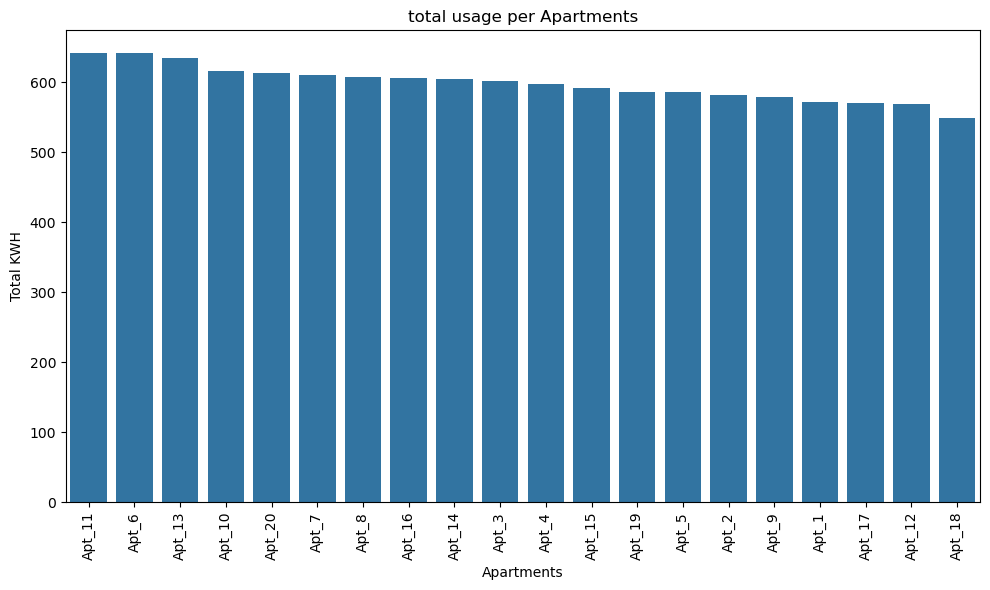

In [26]:
plt.figure(figsize=(10,6))
sns.barplot(x=usage_per_apartment.index,y=usage_per_apartment.values)
plt.xticks(rotation=90)
plt.title("total usage per Apartments")
plt.xlabel("Apartments")
plt.ylabel("Total KWH")
plt.tight_layout() 
plt.show()           
           
           

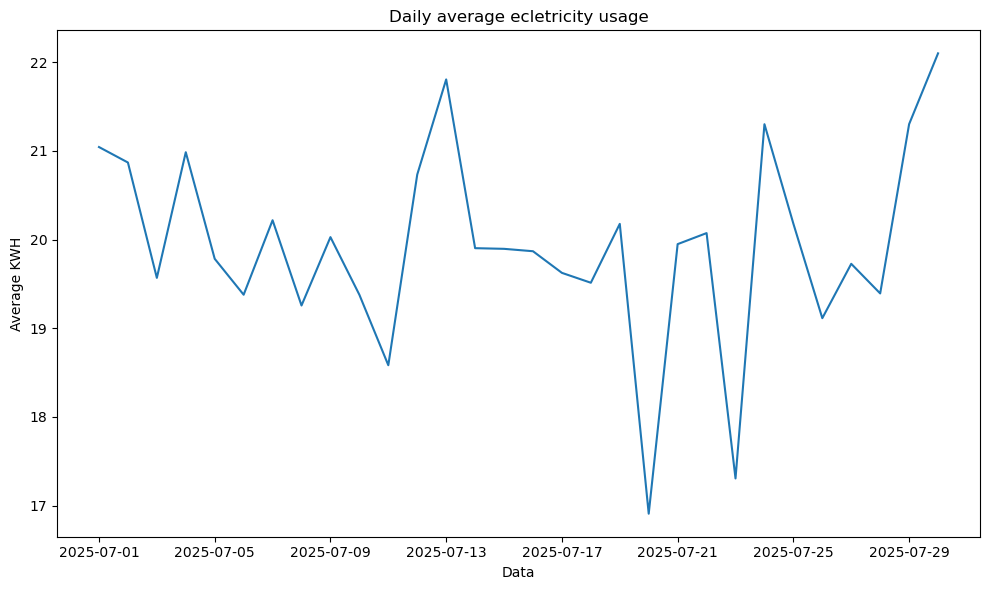

In [27]:
plt.figure(figsize=(10,6))
sns.lineplot(x=daily_avg.index, y=daily_avg.values)
plt.title("Daily average ecletricity usage")
plt.xlabel("Data")
plt.ylabel("Average KWH")
plt.tight_layout()
plt.show()

In [31]:
threshold=df["Electricity_usage"].mean()+2*df["Electricity_usage"].std()
df["High_usage_flag"]=df["Electricity_usage"]>threshold
print(df[df["High_usage_flag"]==True].head())

          Date Apartment  Electricity_usage  High_usage_flag
113 2025-07-24     Apt_4              32.32             True
125 2025-07-06     Apt_5              30.95             True
179 2025-07-30     Apt_6              33.60             True
209 2025-07-30     Apt_7              39.26             True
220 2025-07-11     Apt_8              31.57             True
